## 141 - Animating Hurricane Forecast Tracks

[Youtube](https://www.youtube.com/watch?v=pWx64k3BHWc)

In [1]:
# Choose a file from: https://ftp.nhc.noaa.gov/atcf/aid_public/

import gzip
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with gzip.open('aep062019.dat.gz', 'r') as f:
    forecast_columns = ['Basin', 'CycloneNum', 'WarnDT', 'Model', 'Forecast_hour', 'Lat', 'Lon']
    df = pd.read_csv(f, header = None, index_col = False, names = forecast_columns, usecols = [0, 1, 2, 4, 5, 6, 7])

df.head()

Basin  CycloneNum      WarnDT  Model  Forecast_hour    Lat     Lon
0    EP           6  2019072612   CARQ            -24   120N   1100W
1    EP           6  2019072612   CARQ            -18   120N   1100W
2    EP           6  2019072612   CARQ            -12   100N   1100W
3    EP           6  2019072612   CARQ             -6   100N   1128W
4    EP           6  2019072612   CARQ              0   100N   1160W

In [3]:
def lat_lon_to_float(values):
    """
    Convert NHC strings to floating point lat/lons.
    """
    result = []
    for v in values:
        if (v[-1] == 'S') or (v[-1] == 'W'):
            divisor = -10
        else:
            divisor = 10
        result.append(int(v[:-1]) / divisor)
    return result

In [4]:
# Test
lat_lon_to_float(['10N', '10S', '10E', '10W'])

df['Lat'] = lat_lon_to_float(df['Lat'])
df['Lon'] = lat_lon_to_float(df['Lon'])

df.head()

Basin  CycloneNum      WarnDT  Model  Forecast_hour   Lat    Lon
0    EP           6  2019072612   CARQ            -24  12.0 -110.0
1    EP           6  2019072612   CARQ            -18  12.0 -110.0
2    EP           6  2019072612   CARQ            -12  10.0 -110.0
3    EP           6  2019072612   CARQ             -6  10.0 -112.8
4    EP           6  2019072612   CARQ              0  10.0 -116.0

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
model_colors = {}

for i, model in enumerate(df['Model'].unique()):
    model_colors[model] = colors[i%10]

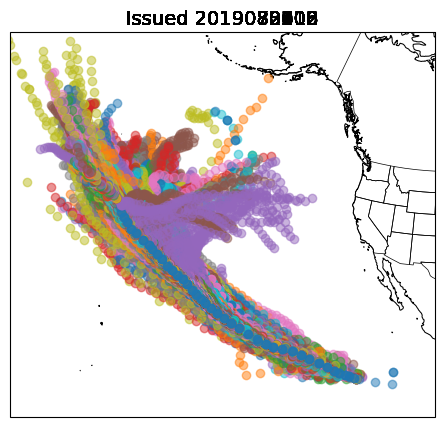

In [7]:
map_crs = ccrs.LambertConformal(central_latitude = 45, central_longitude = -100)
data_crs = ccrs.PlateCarree()

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(111, projection = map_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

artists = []

for warndt in df['WarnDT'].unique():
    
    text = ax.text(0.5, 1.02, f'Issued {warndt}', ha = 'center', 
                   transform = ax.transAxes, fontsize = 14)

    timestep_artists = [text]

    time_df = df.loc[df['WarnDT'] == warndt]

    for model in time_df['Model'].unique():
                   model_path = time_df.loc[time_df['Model'] == model]
                   s = ax.scatter(model_path['Lon'], model_path['Lat'], alpha = 0.5, transform = data_crs, color = model_colors[model])

                   timestep_artists.append(s)

    artists.append(timestep_artists)
    ax.set_extent([-180, -105, 5, 55])

In [8]:
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML

In [9]:
anim = ArtistAnimation(fig, artists, interval = 1000)
HTML(anim.to_jshtml())